In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from scipy.interpolate import interp1d
from seaborn import violinplot

%matplotlib inline

In [2]:
# read dataframes
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')

In [3]:
# delete unused ids 
train.drop('Unnamed: 0', 1, inplace=True)
X_train.drop('Unnamed: 0', 1, inplace=True)
X_test.drop('Unnamed: 0', 1, inplace=True)

In [4]:
# create target value
y_train = train['relevance'].tolist()

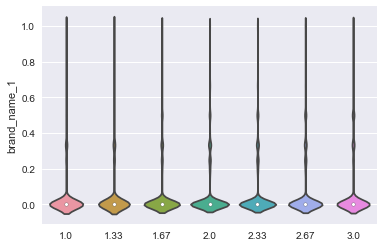

brand_name_1 (0.054080423844774399, 4.6029508970969538e-49)


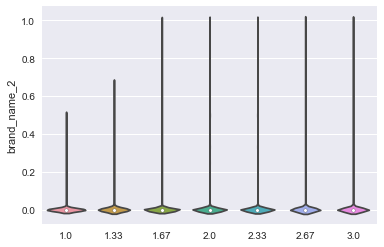

brand_name_2 (0.020044281023189465, 4.9420079591034243e-08)


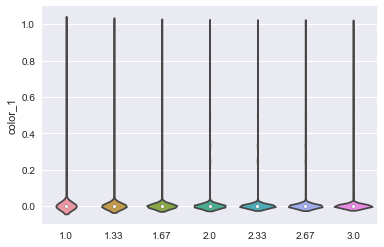

color_1 (-0.0080051299918211041, 0.029424907227295485)


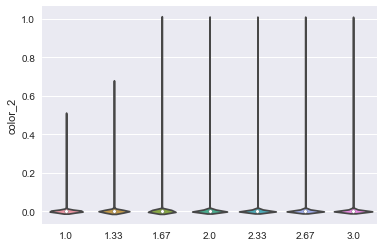

color_2 (0.0015584551030469978, 0.67159379334154334)


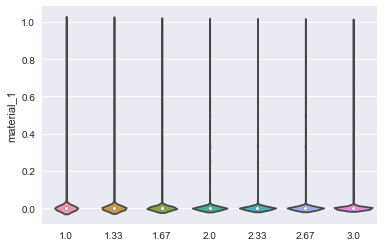

material_1 (-0.012744908110198135, 0.0005257940580208197)


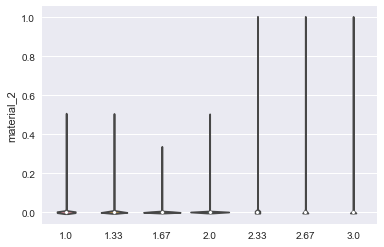

material_2 (-0.0027835397549871342, 0.44890951421289083)


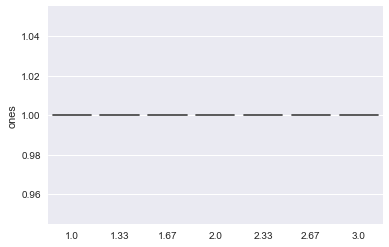

ones (nan, 1.0)


C:\Anaconda2\lib\site-packages\scipy\stats\stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Anaconda2\lib\site-packages\scipy\stats\stats.py:3030: RuntimeWarning: invalid value encountered in double_scalars
  t_squared = r**2 * (df / ((1.0 - r) * (1.0 + r)))
C:\Anaconda2\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


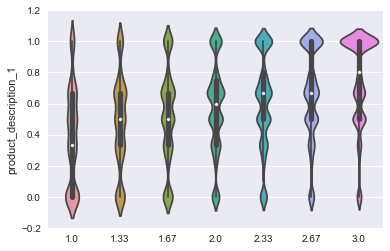

product_description_1 (0.29566404531285273, 0.0)


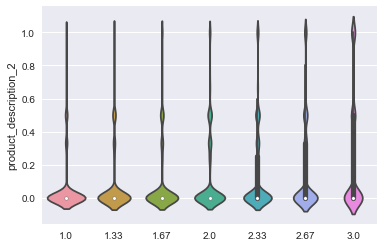

product_description_2 (0.1835331225760202, 0.0)


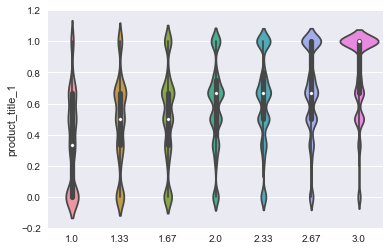

product_title_1 (0.35647025848240543, 0.0)


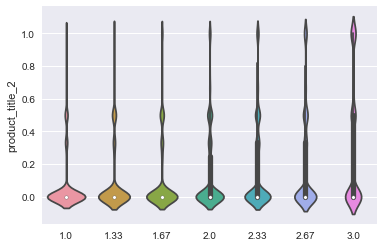

product_title_2 (0.21683964803270164, 0.0)


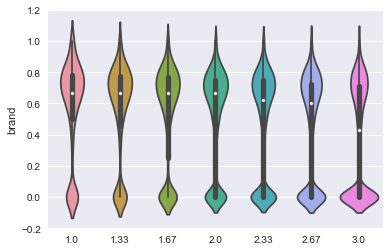

brand (-0.174728144293126, 0.0)


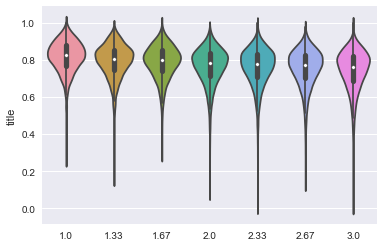

title (-0.16262290433374998, 0.0)


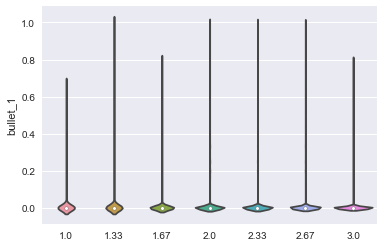

bullet_1 (-0.041497860932470883, 1.406175098519332e-29)


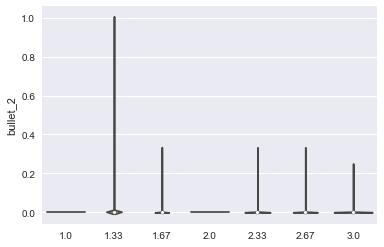

bullet_2 (-0.0093215594624260628, 0.011216271449104068)


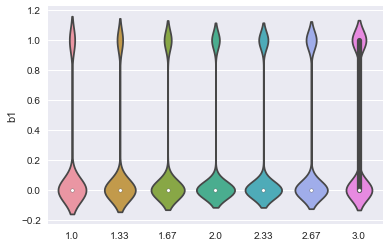

b1 (0.14551884839471929, 0.0)


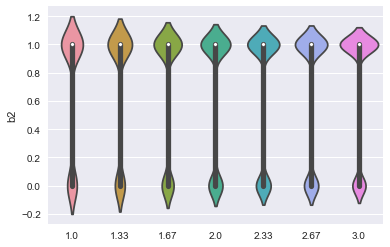

b2 (0.031609953631297406, 7.8814174758539956e-18)


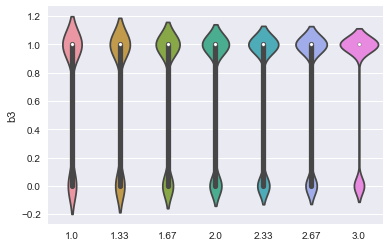

b3 (0.076558292695719302, 1.3031839362302755e-96)


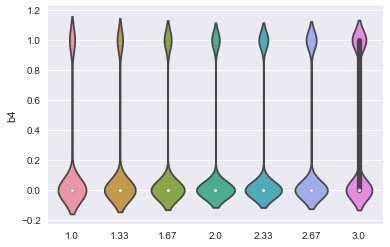

b4 (0.14580424004767739, 0.0)


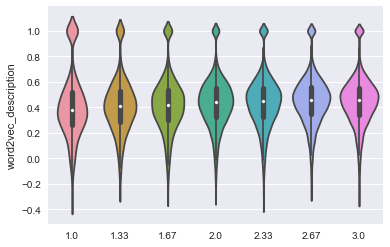

word2vec_description (0.049879678585250546, 5.4308633074886465e-42)


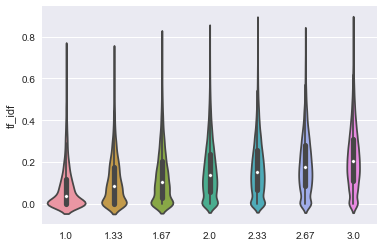

tf_idf (0.24197988670244205, 0.0)


In [5]:
# print pearson correlations between each feature and target value
# and plots
names = X_train.columns.values
for name in names:
    violinplot(y_train, X_train[name])
    plt.show()
    print name, pearsonr(X_train[name], y_train)

In [6]:
# from plots and correlations lets select these features: 'brand' (with 'b1' boolean flag), 'product_description_1', 
# 'tf_idf', 'word2vec_description', 'title' and 'ones' for linear models
sel_X_train = X_train[['brand', 'product_description_1', 'tf_idf', 'product_title_1', 'ones', 'b1', 
                       'word2vec_description', 'title']]
sel_X_test = X_test[['brand', 'product_description_1', 'tf_idf', 'product_title_1', 'ones', 'b1', 
                     'word2vec_description', 'title']]

In [7]:
sel_X_train.to_csv('sel_X_train.csv')
sel_X_test.to_csv('sel_X_test.csv')